# Comparing Custom KernelizedSVC vs Sklearn KernelizedSVC

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from ml_lib import KernelizedSVC
from utils.helpers import (evaluate_metrics, train_time, cross_validate, 
                           plot_confusion_matrix, plot_decision_boundary)

## 1. Dataset Generation

In [3]:
# Synthetic dataset for visual decision boundary evaluation
X_vis, y_vis = make_moons(n_samples=300, noise=0.1, random_state=42)


scaler_blobs = StandardScaler()
X_vis = scaler_blobs.fit_transform(X_vis)

# Real-world medical dataset (binary classification)
X_bc, y_bc = load_breast_cancer(return_X_y=True)
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

scaler_bc = StandardScaler()
X_train_bc = scaler_bc.fit_transform(X_train_bc)
X_test_bc = scaler_bc.transform(X_test_bc)


## 2. Model Training 

In [4]:
csvc = KernelizedSVC(C=1, kernel='rbf')
svc = SVC(C=1, kernel='rbf')

csvc.fit(X_train_bc, y_train_bc)
svc.fit(X_train_bc, y_train_bc)

train_time(csvc, X_train_bc, y_train_bc)
train_time(svc, X_train_bc, y_train_bc)

Model trained in 0.1249 seconds.
Model trained in 0.0003 seconds.


0.0003

## 3. Predictions & Evaluation

### 3.1. Accuracy, precision, recall, F1

In [5]:
y_pred_csvc = csvc.predict(X_test_bc)
y_pred_svc = svc.predict(X_test_bc)

display(evaluate_metrics(y_test_bc, y_pred_csvc))
display(evaluate_metrics(y_test_bc, y_pred_svc))

,Model,Accuracy,Precision,Recall,F1
0,Model Evaluation,0.982456,0.972603,1.0,0.986111


,Model,Accuracy,Precision,Recall,F1
0,Model Evaluation,0.982456,0.972603,1.0,0.986111


### 3.2. Confusion Matrix

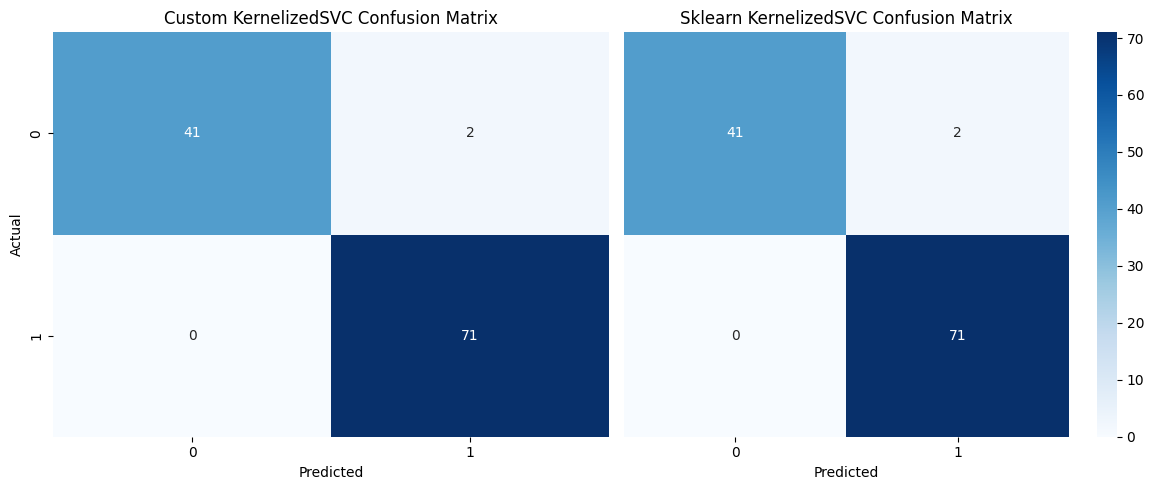

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 5))

plot_confusion_matrix(y_test_bc, y_pred_csvc, ax=ax1, title="Custom KernelizedSVC Confusion Matrix", cbar=False)
plot_confusion_matrix(y_test_bc, y_pred_svc, ax=ax2, title="Sklearn KernelizedSVC Confusion Matrix", yvisible=False) 

plt.tight_layout()
plt.show()

### 3.3. Decision Boundary

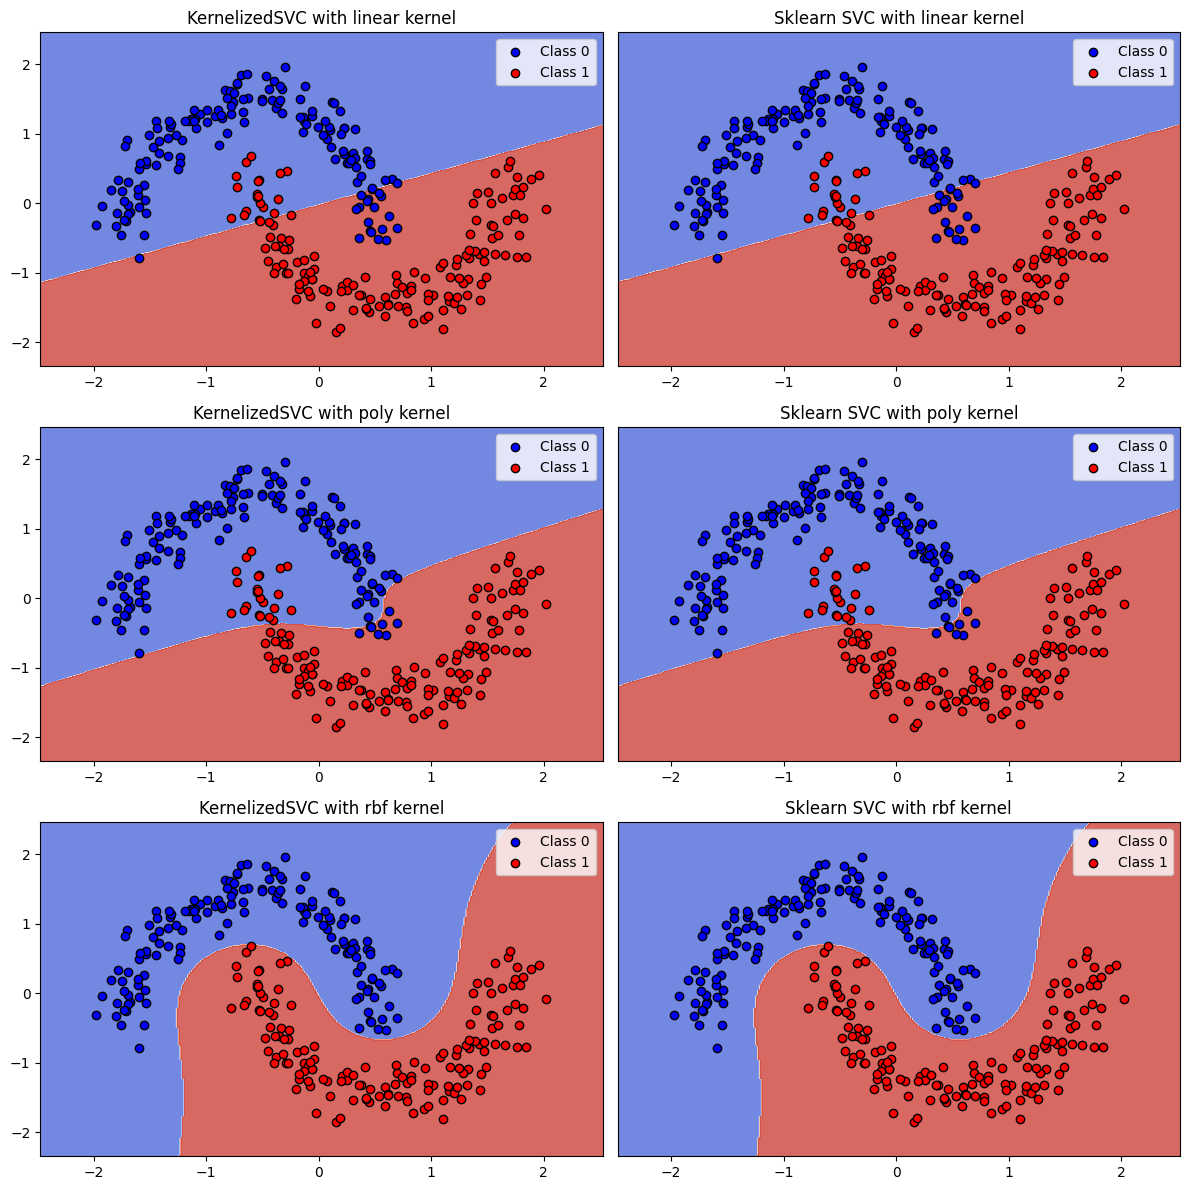

In [13]:
kernels = ['linear', 'poly', 'rbf']

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for row_axes, kernel in zip(axes, kernels):
    csvc = KernelizedSVC(kernel=kernel)
    svc = SVC(kernel=kernel)

    csvc.fit(X_vis, y_vis)
    svc.fit(X_vis, y_vis)

    y_pred_csvc = csvc.predict(X_vis)
    y_pred_svc = svc.predict(X_vis)

    plot_decision_boundary(csvc, X_vis, y_vis, row_axes[0], f'KernelizedSVC with {kernel} kernel')
    plot_decision_boundary(svc, X_vis, y_vis, row_axes[1], f'Sklearn SVC with {kernel} kernel', yvisible=False)


plt.tight_layout()

## 4. Cross-Validation

In [8]:
cross_validate(KernelizedSVC, X_bc, y_bc, cv=4)


Fold 1:
Accuracy: 0.9720
Precision: 0.9775
Recall: 0.9775
F1: 0.9775

Fold 2:
Accuracy: 0.9789
Precision: 0.9897
Recall: 0.9796
F1: 0.9846

Fold 3:
Accuracy: 0.9789
Precision: 0.9670
Recall: 1.0000
F1: 0.9832

Fold 4:
Accuracy: 0.9507
Precision: 0.9310
Recall: 0.9878
F1: 0.9586


,accuracy,precision,recall,f1
0,0.97012,0.966322,0.986231,0.975991


In [9]:
cross_validate(SVC, X_bc, y_bc, cv=4)


Fold 1:
Accuracy: 0.9720
Precision: 0.9775
Recall: 0.9775
F1: 0.9775

Fold 2:
Accuracy: 0.9789
Precision: 0.9897
Recall: 0.9796
F1: 0.9846

Fold 3:
Accuracy: 0.9789
Precision: 0.9670
Recall: 1.0000
F1: 0.9832

Fold 4:
Accuracy: 0.9507
Precision: 0.9310
Recall: 0.9878
F1: 0.9586


,accuracy,precision,recall,f1
0,0.97012,0.966322,0.986231,0.975991
